In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load dataset
data = pd.read_excel("housing.xlsx")
print("Dataset loaded successfully")
print(data.head())

Dataset loaded successfully
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


In [7]:
# handle missing values(if any)
data = data.dropna()
print(f"After dropping missing values,data shape: {data.shape}")

After dropping missing values,data shape: (20433, 10)


In [8]:
# Encode "ocean_proximity" colun using onehot encoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_values = encoder.fit_transform(data[["ocean_proximity"]])
new_cols = encoder.get_feature_names_out(["ocean_proximity"])
data_encoded = pd.DataFrame(encoded_values, columns=new_cols, index=data.index)


In [9]:
#merge encoded data with original
data_final = pd.concat([data.drop(columns=["ocean_proximity"]),data_encoded],axis=1)
print("onehot encoding complete!")

onehot encoding complete!


In [10]:
#split into features(x) and (y)
x = data_final.drop(columns=["median_house_value"])
y = data_final["median_house_value"]

In [11]:
# Train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(f"Data split into train and test")

Data split into train and test


In [12]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print("feature scaling complete!")

feature scaling complete!


In [13]:
# Train linear regresiion model
model = LinearRegression()
model.fit(x_train_scaled,y_train)
print("Model training complete!")

Model training complete!


In [14]:
# Make predictions
y_pred = model.predict(x_test_scaled)

In [15]:
# Evaluate Model
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("/n Model Evaluation Metrics: ")
print(f"Mean Absolute Error(mae): {mae: .2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

/n Model Evaluation Metrics: 
Mean Absolute Error(mae):  51282.41
Mean Squared Error (MSE): 5179293732.61
Root Mean Squared Error (RMSE): 71967.31
R² Score: 0.6187


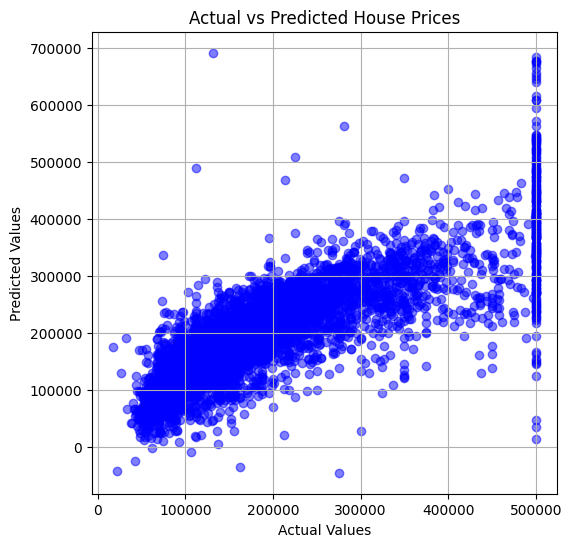

In [16]:
# Visualize actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()



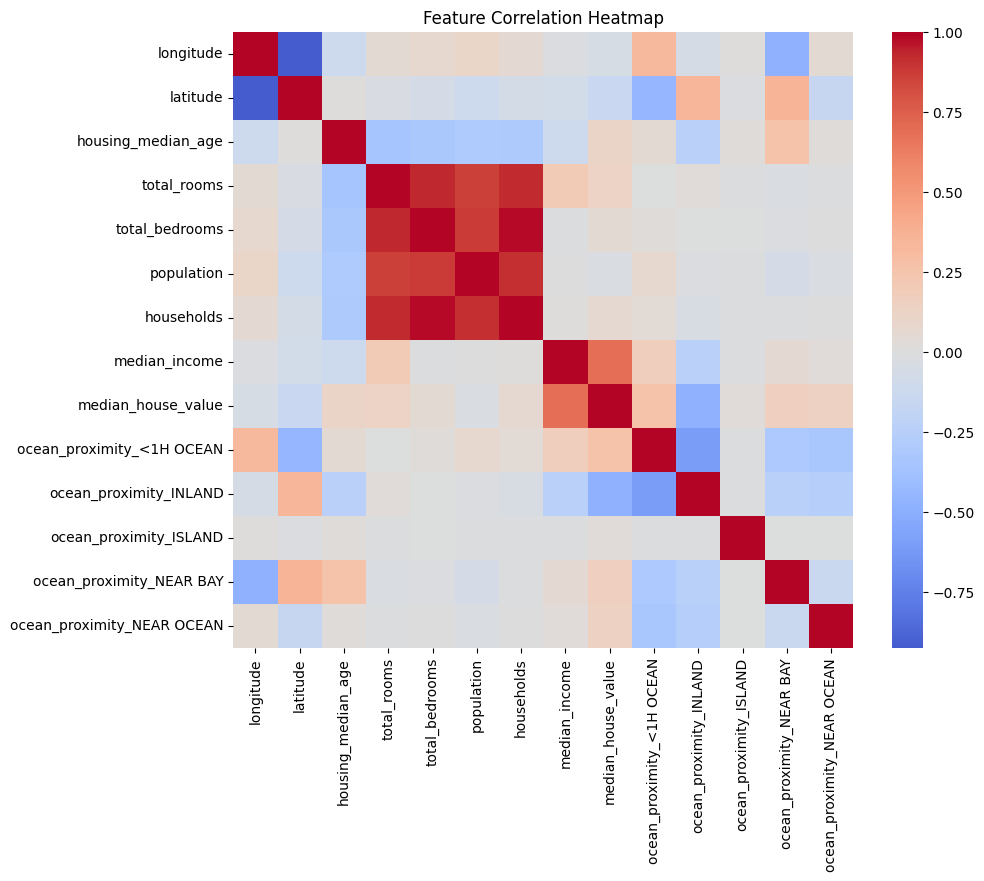

In [17]:
# Correlation Heatmap
corr = data_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()